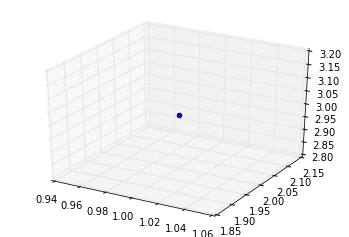

In [43]:
import os
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [160]:
clean_examples = pd.read_csv('MicrosoftGestureDataset-RC/data/P1_1_10_p06.csv',sep=' ',header=None).drop(xrange(0,20),axis=0).drop(0,axis=1).drop((xrange(4,80,4)),axis=1).drop(80)

In [145]:
example[[1,2,3]].loc[20]

1    0.048343
2    0.138585
3    2.737276
Name: 20, dtype: float64

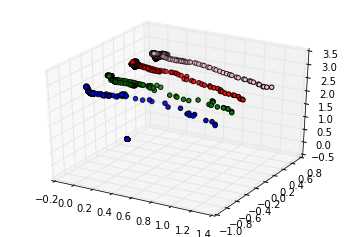

In [146]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_vals = example[[1]]
y_vals = example[[2]]
z_vals = example[[3]]
x2_vals = example[[77]]
y2_vals = example[[78]]
z2_vals = example[[79]]
x3_vals = example[[69]]
y3_vals = example[[70]]
z3_vals = example[[71]]
x4_vals = example[[9]]
y4_vals = example[[10]]
z4_vals = example[[11]]


ax.scatter(x_vals,y_vals,z_vals,c='red')
ax.scatter(x2_vals,y2_vals,z2_vals,c='blue')
ax.scatter(x3_vals,y3_vals,z3_vals,c='green')
ax.scatter(x4_vals,y4_vals,z4_vals,c='pink')

In [161]:
first_frame=clean_examples[0:1]
first_frame[first_frame==1].index[0]
first_frame=first_frame.drop(80,axis=1)

20

In [172]:
first_frame

,1,2,3,5,6,7,9,10,11,13,...,67,69,70,71,73,74,75,77,78,79
20,0.048343,0.138585,2.737276,0.047405,0.206606,2.740573,0.045471,0.547363,2.732049,0.05938,...,2.738009,0.127686,-0.419434,2.810174,0.129272,-0.788574,2.859239,0.139686,-0.850713,2.823731


In [2]:
gestures = pd.DataFrame()
labels = pd.Series()
labels_array=[]
sizes = [1];
i=0
for root, dirs, files in os.walk("MicrosoftGestureDataset-RC/data"):
    for file in files:
        if file.endswith(".csv"):
            temp = pd.read_csv(os.path.join(root,file),sep=' ',header=None)[:539]
            temp = temp.drop(xrange(0,20),axis=0)
            temp = temp.drop(0,axis=1)
            temp = temp.drop((xrange(4,80,4)),axis=1)
#             print file
            gestures[i] = temp.values.flatten()
#             gestures[i]['label'] = [file[file.find('_',3)+1:file.rfind('_')].replace('A','')]
#             print ' '+'added mean()'
#             print ' '+'label added'
#             gestures[i]['label']=file[file.find('_',3)+1:file.rfind('_')].replace('A',''); 
#             labels=labels.append(pd.Series([file[file.find('_',3)+1:file.rfind('_')].replace('A','')],index=[i]));
            labels_array.append(file[file.find('_',3)+1:file.rfind('_')].replace('A',''))
            sizes.append(len(temp))
            i=i+1;
print str(i)+" gesture files loaded"



594 gesture files loaded


In [3]:
from __future__ import division
print str(31659/519)+str(" different features")

61.0 different features


In [4]:
gestures.shape

(31659, 594)

In [5]:
gestures.loc[len(gestures)] = labels_array

In [6]:
gestures

,0,1,2,3,4,5,6,7,8,9,...,584,585,586,587,588,589,590,591,592,593
0,-0.118736,-0.120718,0.088099,-0.05455,0.13555,0.062124,0.120273,0,-0.012231,-0.247727,...,-0.270629,-0.116913,0.048343,-0.032715,0.151298,-0.128276,-0.010908,0,0.112304,0
1,0.05274,0.167302,0.080941,0.191406,0.18315,0.115981,0.106115,0,0.257817,0.094903,...,0.164475,0.255878,0.138585,0.201708,0.181185,0.161201,0.008233,0,0.185075,0
2,3.00967,2.79612,2.92048,2.76168,2.85141,2.7479,2.78918,0,2.85511,2.89348,...,3.09694,3.12307,2.73728,2.93226,2.74411,2.79027,2.89729,0,2.88829,0
3,-0.124064,-0.121055,0.09061,-0.054369,0.137917,0.063199,0.119616,0,-0.012457,-0.254977,...,-0.275141,-0.116715,0.047405,-0.035785,0.154819,-0.130697,-0.009292,0,0.115455,0
4,0.124251,0.233745,0.147542,0.261283,0.248693,0.184397,0.17575,0,0.329515,0.160403,...,0.234749,0.325373,0.206606,0.269899,0.247892,0.226983,0.071935,0,0.250439,0
5,3.03391,2.79856,2.93636,2.80511,2.88849,2.80212,2.78457,0,2.85729,2.94683,...,3.11984,3.11663,2.74057,2.97673,2.76958,2.80143,2.94769,0,2.91189,0
6,-0.127197,-0.117188,0.091492,-0.07135,0.153809,0.097107,0.116333,0,-0.011925,-0.260742,...,-0.279297,-0.115723,0.045471,-0.027542,0.164429,-0.139893,0.002188,0,0.128296,0
7,0.490723,0.566406,0.485107,0.633301,0.594727,0.567383,0.523926,0,0.688477,0.53418,...,0.594238,0.672852,0.547363,0.635254,0.591309,0.558594,0.430176,0,0.585938,0
8,3.02225,2.7905,2.92628,2.79032,2.87517,2.80274,2.77627,0,2.84848,2.95303,...,3.1085,3.09936,2.73205,2.96214,2.75789,2.79212,2.94833,0,2.90067,0
9,-0.120148,-0.119568,0.08609,-0.095337,0.167725,0.117188,0.128174,0,-0.002167,-0.244263,...,-0.276733,-0.118347,0.05938,-0.00547,0.168701,-0.144226,-0.008621,0,0.139618,0


In [7]:
# columns are individual gesture files
# labels can be appended from the labels_array
joint1 = gestures[:519]
joint2 = gestures[519:1038]

In [8]:
# initialize a classifier for each joint
gnb1 = GaussianNB()
gnb2 = GaussianNB()

In [9]:
joint1.T

,0,1,2,3,4,5,6,7,8,9,...,509,510,511,512,513,514,515,516,517,518
0,-0.118736,0.05274,3.00967,-0.124064,0.124251,3.03391,-0.127197,0.490723,3.02225,-0.120148,...,-0.401749,-0.179289,2.98637,0.015713,0.36314,3.04631,0.055505,0.09865,3.08913,0.078594
1,-0.120718,0.167302,2.79612,-0.121055,0.233745,2.79856,-0.117188,0.566406,2.7905,-0.119568,...,-0.333154,-0.095396,2.69574,0.040802,0.468765,2.84147,0.125938,0.299246,2.93538,0.095279
2,0.088099,0.080941,2.92048,0.09061,0.147542,2.93636,0.091492,0.485107,2.92628,0.08609,...,-0.170744,-0.108989,2.85675,0.249465,0.373894,2.94717,0.287551,0.112664,2.90997,0.270513
3,-0.05455,0.191406,2.76168,-0.054369,0.261283,2.80511,-0.07135,0.633301,2.79032,-0.095337,...,-0.299779,0.00317,2.76782,0.097471,0.514088,2.77987,0.156478,0.297355,2.75542,-0.003279
4,0.13555,0.18315,2.85141,0.137917,0.248693,2.88849,0.153809,0.594727,2.87517,0.167725,...,-0.112901,-0.01292,2.83017,0.31891,0.476094,2.90381,0.36088,0.234846,2.91292,0.372597
5,0.062124,0.115981,2.7479,0.063199,0.184397,2.80212,0.097107,0.567383,2.80274,0.117188,...,0.032751,-0.02979,2.56477,0.251362,0.437181,2.82145,0.268126,0.194061,2.77884,0.224665
6,0.120273,0.106115,2.78918,0.119616,0.17575,2.78457,0.116333,0.523926,2.77627,0.128174,...,-0.069645,-0.126625,2.68068,0.27704,0.412022,2.82461,0.298956,0.138781,2.84596,0.317726
7,0,0,0,0,0,0,0,0,0,0,...,-0.338395,-0.043556,2.85552,0.053281,0.509418,2.97134,0.104188,0.237626,2.97023,0.110185
8,-0.012231,0.257817,2.85511,-0.012457,0.329515,2.85729,-0.011925,0.688477,2.84848,-0.002167,...,-0.21294,0.004074,2.78347,0.148827,0.564122,2.86756,0.178329,0.298353,2.88209,0.18874
9,-0.247727,0.094903,2.89348,-0.254977,0.160403,2.94683,-0.260742,0.53418,2.95303,-0.244263,...,-0.452861,-0.165401,2.82713,-0.10336,0.398219,2.95587,-0.06151,0.135916,2.94573,-0.047489


In [10]:
gnb1.fit(joint1.T,labels_array).predict

<bound method GaussianNB.predict of GaussianNB()>